## Ungraded Lab: MNIST Autoencoder

You will now work on an autoencoder that works on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.

In [ ]:
!pip install tensorflow_datasets

## Imports

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Prepare the Dataset

You will load the MNIST data from TFDS into train and test sets. Let's first define a preprocessing function for normalizing and flattening the images. Since we'll be training an autoencoder, this will return `image, image` because the input will also be the target or label while training.


In [ ]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [ ]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build the Model

You will now build a simple autoencoder to ingest the data. Like before, the encoder will compress the input and reconstructs it in the decoder output. ![Autoencoder Flowchart](auto.png)

In [ ]:
#Bulid the Model
def Simple_Autoencoder(input_layers):
  encoder = tf.keras.layers.Dense(32,activation = 'relu')(input_layers)
  decoder = tf.keras.layers.Dense(784,activation = 'sigmoid')(input_layers)

  return encoder,decoder



# set the input shape
input = tf.keras.layers.Input(shape=(784,))


# get the encoder and decoder output
encoder_output,decoder_output = Simple_Autoencoder(input)


# setup the encoder Model because you will visualize its output later
encoder_model = tf.keras.Model(inputs=input,outputs=encoder_output)

# setup the autoencoder Model
Simple_Autoencoder = tf.keras.Model(inputs=input,outputs=decoder_output)


In [ ]:
auto_encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
Total params: 615440 (2.35 MB)
Trainable params: 615440 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the Model

You will setup the model for training. You can use binary crossentropy to measure the loss between pixel values that range from 0 (black) to 1 (white).

In [ ]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
Simple_Autoencoder.compile(optimizer = 'adam',loss='binary_crossentropy', metrics = ['accuracy'])

## Train the Model

In [ ]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step = 60000/BATCH_SIZE
Simple_Autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=10)


Epoch 1/10
468/468 [==============================] - 8s 14ms/step - loss: 0.1848 - accuracy: 0.0130
Epoch 2/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1179 - accuracy: 0.0120
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1014 - accuracy: 0.0129
Epoch 4/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0921 - accuracy: 0.0136
Epoch 5/10
468/468 [==============================] - 4s 9ms/step - loss: 0.0859 - accuracy: 0.0136
Epoch 6/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0814 - accuracy: 0.0139
Epoch 7/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0780 - accuracy: 0.0138
Epoch 8/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0754 - accuracy: 0.0143
Epoch 9/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0732 - accuracy: 0.0146
Epoch 10/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0715 - accuracy: 0.014

## Display sample results

You can now visualize the results. The utility functions below will help in plotting the encoded and decoded values.

In [ ]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 482ms/step


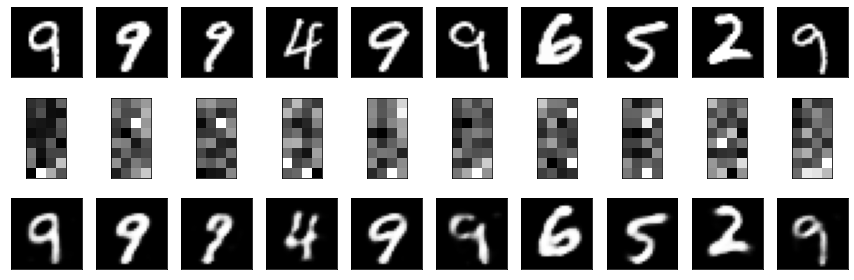

In [ ]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])

Deepencoder

In [ ]:
#build the Model
def Deep_Autoencoder(input_layers):
  encoder = tf.keras.layers.Dense(128,activation = 'relu')(input_layers)
  encoder = tf.keras.layers.Dense(64,activation = 'relu')(encoder)
  encoder = tf.keras.layers.Dense(32,activation = 'relu')(encoder)
  decoder = tf.keras.layers.Dense(64,activation = 'relu')(encoder)
  decoder = tf.keras.layers.Dense(128,activation = 'relu')(decoder)
  decoder = tf.keras.layers.Dense(784,activation = 'sigmoid')(decoder)

  return encoder,decoder



# set the input shape
input = tf.keras.layers.Input(shape=(784,))


# get the encoder and decoder output
encoder_output,decoder_output = Deep_Autoencoder(input)


# setup the encoder Model because you will visualize its output later
encoder_model = tf.keras.Model(inputs=input,outputs=encoder_output)

# setup the autoencoder Model
Deep_Autoencoder = tf.keras.Model(inputs=input,outputs=decoder_output)

In [ ]:
Deep_Autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 784)               1011

In [ ]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
Deep_Autoencoder.compile(optimizer = 'adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step = 60000/BATCH_SIZE
Deep_Autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=10)


Epoch 1/10
468/468 [==============================] - 5s 7ms/step - loss: 0.2019 - accuracy: 0.0111
Epoch 2/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1291 - accuracy: 0.0105
Epoch 3/10
468/468 [==============================] - 4s 9ms/step - loss: 0.1156 - accuracy: 0.0111
Epoch 4/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1091 - accuracy: 0.0116
Epoch 5/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1046 - accuracy: 0.0128
Epoch 6/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1015 - accuracy: 0.0133
Epoch 7/10
468/468 [==============================] - 4s 9ms/step - loss: 0.0991 - accuracy: 0.0125
Epoch 8/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0971 - accuracy: 0.0133
Epoch 9/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0955 - accuracy: 0.0134
Epoch 10/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0941 - accuracy: 0.0127